<a href="https://colab.research.google.com/github/marianavalho/ML2025/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/200], Loss: 23.1746
Epoch [20/200], Loss: 15.6327
Epoch [30/200], Loss: 10.6108
Epoch [40/200], Loss: 7.2651
Epoch [50/200], Loss: 5.0353
Epoch [60/200], Loss: 3.5487
Epoch [70/200], Loss: 2.5573
Epoch [80/200], Loss: 1.8959
Epoch [90/200], Loss: 1.4546
Epoch [100/200], Loss: 1.1601
Epoch [110/200], Loss: 0.9634
Epoch [120/200], Loss: 0.8321
Epoch [130/200], Loss: 0.7444
Epoch [140/200], Loss: 0.6858
Epoch [150/200], Loss: 0.6467
Epoch [160/200], Loss: 0.6204
Epoch [170/200], Loss: 0.6029
Epoch [180/200], Loss: 0.5911
Epoch [190/200], Loss: 0.5832
Epoch [200/200], Loss: 0.5779


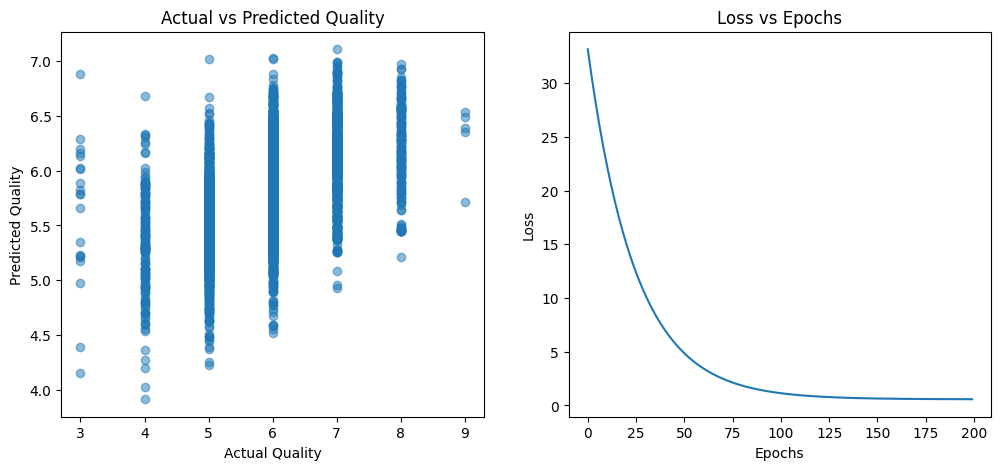

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


url = "/winequality-white.csv" # Having the dataset uploaded to colab
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values  # Input features - physicochemical properties
y = data['quality'].values  # Output variable - wine quality, score between 0 and 10


scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)


class WineQualityModel(nn.Module): # Keyword: Model (is a simple linear regression model)
    def __init__(self, input_size, output_size):
        super(WineQualityModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)



input_size = X.shape[1]  # Keyword: Input Size (11 features)
output_size = 1  # Keyword: Output Size (that is wine quality)
model = WineQualityModel(input_size, output_size)

criterion = nn.MSELoss()  # Keyword: Loss Function (how well the model is performing) Mean Squared Error loss function

optimizer = optim.SGD(model.parameters(), lr=0.01) # Keyword: Optimizer (updates the model’s weights to minimize the loss)


epochs = 200 # Keyword: Epoch (one complete pass through the dataset)
losses = []

for epoch in range(epochs):
    predictions = model(X)  # Keyword: Forward Pass (where the model computes predictions using the current model weights)

    loss = criterion(predictions, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()     # Keyword: Backward Pass (where the model computes gradients of the loss)

    optimizer.step() # Keyword: Gradient Descent (Update the model's weights using the computed gradients)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y.detach().numpy(), predictions.detach().numpy(), alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')

# Plot 2: Loss vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

#  Keyword: Predict (After training the model we can predict wine quality for new input data)